# Baseline Scenario

In [1]:
import os

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'

# Get the current working directory of the project
project_root = os.path.abspath(os.getcwd())
print(f"Project root directory: {project_root}")

# Relative path to the file from the project root
relative_path = r"tare_model_scenario_baseline_v2.3.ipynb"

# Construct the absolute path to the file
file_path = os.path.join(project_root, relative_path)
print(f"File path: {file_path}")

# Run the notebook and import variables
if os.path.exists(relative_path):
    get_ipython().run_line_magic('run', f'-i "{relative_path}"')
    print("Baseline Scenario - Model Run Complete")
else:
    print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_scenario_baseline_v2.3.ipynb
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v2.3.ipynb
Loaded All TARE Model Functions
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results

-------------------------------------------------------------------------------------------------------
Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped.
If changes are made to the file path, then the program will not run properly.
-------------------------------------------------------------------------------------------------------

---------------------------------------------------------

# Basic Retrofit Scenarios (MP8)
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

## Dataframe for Electric Resistance Cooking (MP7)

In [2]:
print(f"""
-------------------------------------------------------------------------------------------------------
We assume the use of Electric Resistance (MP7) rather than Induction (MP8).
Electric Resistance is significantly cheaper and only slightly less efficient than Induction.
-------------------------------------------------------------------------------------------------------
""")

# Measure Package 7
menu_mp = 7
input_mp = 'upgrade07'

filename = "upgrade07_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp7 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp7['in.vacancy_status'] == 'Occupied'
df_euss_am_mp7 = df_euss_am_mp7.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp7['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp7 = df_euss_am_mp7.loc[house_type_filter]


-------------------------------------------------------------------------------------------------------
We assume the use of Electric Resistance (MP7) rather than Induction (MP8).
Electric Resistance is significantly cheaper and only slightly less efficient than Induction.
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade07_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade07_metadata_and_annual_results.csv




In [3]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp7['in.state'].eq(input_state)
    df_euss_am_mp7 = df_euss_am_mp7.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp7['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp7 = df_euss_am_mp7.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp7

You chose to filter for: PA
You chose to analyze all of state: PA


,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,...,out.emissions_reduction.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg,upgrade.clothes_dryer,upgrade.cooking_range,upgrade.hvac_cooling_efficiency,upgrade.hvac_heating_efficiency,upgrade.water_heater_efficiency
410846,119,7,242.131013,True,2152.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour1,4,...,0.000000,4367.397352,2552.828291,2985.641141,2356.289439,"Electric, 100% Usage","Electric, 100% Usage",Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
410847,122,7,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour18,4,...,0.000000,10479.768179,6954.371623,7797.415226,6648.492515,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
410848,150,7,242.131013,False,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour2,4,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
410849,153,7,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour6,3,...,0.000000,11048.097647,6200.439415,7363.122758,5775.168899,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 50 gal, 3.45 UEF"
410850,162,7,242.131013,True,2663.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour8,5,...,0.000000,12947.903971,8666.012863,9676.629818,8324.377523,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 80 gal, 3.45 UEF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433889,549882,7,242.131013,True,1202.0,Non-CBSA Middle Atlantic,5A,5A,Hour5,2,...,0.000000,5212.871757,3310.560695,3739.637305,3185.908976,NaN,NaN,Heat Pump,"MSHP, SEER 15, 9.0 HSPF, Max Load","Electric Heat Pump, 50 gal, 3.45 UEF"
433891,549915,7,242.131013,False,2176.0,Non-CBSA Middle Atlantic,5A,5A,Hour0,5,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
433892,549937,7,242.131013,True,885.0,Non-CBSA Middle Atlantic,5A,5A,Hour20,4,...,0.000000,4636.242910,1673.632015,2257.364571,1154.203887,"Electric, 120% Usage","Electric, 120% Usage",Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 66 gal, 3.35 UEF"
433893,549963,7,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour13,3,...,0.000000,4903.857419,609.743358,1488.137683,-84.117798,NaN,NaN,Heat Pump,"ASHP, SEER 15, 9.0 HSPF","Electric Heat Pump, 50 gal, 3.45 UEF"


## Dataframe used for other end-uses (MP8)

In [4]:
# Measure Package 8
menu_mp = 8
input_mp = 'upgrade08'
scenario_name = 'Basic-BAU'
cost_scenario = 'BAU Costs'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

filename = "upgrade08_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp8 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp8['in.vacancy_status'] == 'Occupied'
df_euss_am_mp8 = df_euss_am_mp8.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp8['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp8 = df_euss_am_mp8.loc[house_type_filter]
# df_euss_am_mp8


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-BAU:
Basic Retrofit: Measure Package 8
BAU Costs
Current Electricity Grid
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade08_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade08_metadata_and_annual_results.csv




In [5]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp8['in.state'].eq(input_state)
    df_euss_am_mp8 = df_euss_am_mp8.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp8['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp8 = df_euss_am_mp8.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp8

You chose to filter for: PA
You chose to analyze all of state: PA


,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,...,out.emissions_reduction.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions_reduction.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg,upgrade.clothes_dryer,upgrade.cooking_range,upgrade.hvac_cooling_efficiency,upgrade.hvac_heating_efficiency,upgrade.hvac_heating_type,upgrade.water_heater_efficiency
410846,119,8,242.131013,True,2152.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour1,4,...,5063.088752,4214.733128,4421.232869,4103.394799,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 66 gal, 3.35 UEF"
410847,122,8,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour18,4,...,12066.712342,10590.254662,10962.614536,10472.994231,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 66 gal, 3.35 UEF"
410848,150,8,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour2,4,...,3103.153770,7434.178003,6435.450158,7914.527787,"Electric, Premium, Heat Pump, Ventless, 80% Usage","Electric, Induction, 80% Usage",Heat Pump,"MSHP, SEER 29.3, 14 HSPF, Max Load",NaN,"Electric Heat Pump, 66 gal, 3.35 UEF"
410849,153,8,242.131013,True,2176.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour6,3,...,12691.688692,10026.235230,10675.202534,9808.721813,NaN,"Electric, Induction, 120% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 50 gal, 3.45 UEF"
410850,162,8,242.131013,True,2663.0,"CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4A,4A,Hour8,5,...,14912.014271,13274.793477,13682.148002,13130.752498,"Electric, Premium, Heat Pump, Ventless, 80% Usage","Electric, Induction, 80% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 80 gal, 3.45 UEF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433889,549882,8,242.131013,True,1202.0,Non-CBSA Middle Atlantic,5A,5A,Hour5,2,...,5882.269769,4814.108725,5058.857189,4740.981471,"Electric, Premium, Heat Pump, Ventless, 120% U...","Electric, Induction, 120% Usage",Heat Pump,"MSHP, SEER 29.3, 14 HSPF, Max Load",NaN,"Electric Heat Pump, 50 gal, 3.45 UEF"
433891,549915,8,242.131013,True,2176.0,Non-CBSA Middle Atlantic,5A,5A,Hour0,5,...,3949.186094,9153.072186,7958.419199,9734.504122,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 80 gal, 3.45 UEF"
433892,549937,8,242.131013,True,885.0,Non-CBSA Middle Atlantic,5A,5A,Hour20,4,...,5643.594000,3941.494074,4289.405772,3628.586099,"Electric, Premium, Heat Pump, Ventless, 120% U...","Electric, Induction, 120% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 66 gal, 3.35 UEF"
433893,549963,8,242.131013,True,1690.0,Non-CBSA Middle Atlantic,5A,5A,Hour13,3,...,6479.951652,4162.716516,4656.122049,3803.239573,"Electric, Premium, Heat Pump, Ventless, 100% U...","Electric, Induction, 100% Usage",Heat Pump,"MSHP, SEER 24, 13 HSPF",Ducted Heat Pump,"Electric Heat Pump, 50 gal, 3.45 UEF"


### Post-Retrofit (MP) Consumption: WHOLE-HOME

In [6]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# df_enduse_compare(df_mp, category, df_baseline):
df_euss_am_mp8_home = df_enduse_compare(df_mp = df_euss_am_mp8,
                                        input_mp=input_mp,
                                        menu_mp=menu_mp,
                                        df_baseline = df_euss_am_baseline_home 
                                       )

# Project Future Energy Consumption
df_euss_am_mp8_home = project_future_consumption(df=df_euss_am_mp8_home,
                                                 hdd_factor_lookup=hdd_factor_lookup,
                                                 menu_mp=menu_mp
                                                 )
df_euss_am_mp8_home


-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

Projecting Future Energy Consumption (Upgraded Equipment): heating
Projecting Future Energy Consumption (Upgraded Equipment): waterHeating
Projecting Future Energy Consumption (Upgraded Equipment): clothesDrying
Projecting Future Energy Consumption (Upgraded Equipment): cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_2028_cooking_consumption,mp8_2028_cooking_reduction_consumption,mp8_2029_cooking_consumption,mp8_2029_cooking_reduction_consumption,mp8_2030_cooking_consumption,mp8_2030_cooking_reduction_consumption,mp8_2031_cooking_consumption,mp8_2031_cooking_reduction_consumption,mp8_2032_cooking_consumption,mp8_2032_cooking_reduction_consumption
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,474.48,511.70,474.48,511.70,474.48,511.70,474.48,511.70,474.48,511.70
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,339.67,0.00,339.67,0.00,339.67,0.00,339.67,0.00,339.67,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,324.43,0.00,324.43,0.00,324.43,0.00,324.43,0.00,324.43,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,429.94,0.00,429.94,0.00,429.94,0.00,429.94,0.00,429.94,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,405.61,435.80,405.61,435.80,405.61,435.80,405.61,435.80,405.61,435.80
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,603.14,0.00,603.14,0.00,603.14,0.00,603.14,0.00,603.14,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,644.76,696.63,644.76,696.63,644.76,696.63,644.76,696.63,644.76,696.63
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00,405.61,0.00


## Public Perspective: Monetized Marginal Damages from Emissions

In [7]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------



### Step 5: Calculate End-use specific marginal damages
**I used the total emissions column for each of the end uses for the following reasons:**
- Most homes only have 1 of each end-use, so it is unlikely that the homes have a significant consumption values from different fuel types. Thus, the total consumption and total emissions column (sum of each dwelling units consumption by end-use for each fuel) is fine to use to calculate marginal damages (social cost)
- We can visualize the emissions in 2 by 2 grid (CO2, PM25, SO2, NOx) with each appliance's heating fuel in a different shape or color. 

In [8]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Marginal Damages: WHOLE-HOME

In [9]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# td_losses = 0.06

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=False,
                                                 )
df_euss_am_mp8_home


-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_2032_cooking_reduction_damages_climate,mp8_2032_cooking_reduction_damages_health,mp8_2032_heating_damages_climate,mp8_2032_heating_damages_co2,mp8_2032_heating_damages_health,mp8_2032_heating_damages_nox,mp8_2032_heating_damages_pm25,mp8_2032_heating_damages_so2,mp8_2032_heating_reduction_damages_climate,mp8_2032_heating_reduction_damages_health
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-22.82,-3.67,427.31,427.31,72.38,7.73,27.06,37.59,369.38,37.98
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,-7.15,16.08,963.03,963.03,163.12,17.41,60.98,84.73,1035.95,317.69
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,-6.82,4.96,511.87,511.87,86.70,9.26,32.41,45.03,2009.96,690.21
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-9.05,20.37,1089.93,1089.93,184.62,19.71,69.02,95.89,1345.55,401.17
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,-8.53,4.64,568.11,568.11,96.22,10.27,35.97,49.98,2031.74,630.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,-19.58,-2.84,571.70,571.70,96.84,10.34,36.20,50.30,314.23,30.94
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,-12.68,16.23,725.67,725.67,122.91,13.12,45.95,63.84,2005.97,951.47
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,-50.05,-27.53,554.61,554.61,151.60,17.24,47.17,87.19,140.48,-112.72
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,-20.56,-1.34,909.25,909.25,248.54,28.26,77.34,142.94,527.08,-155.97


In [10]:
# heating_df_cols = ['bldg_id', 'subregion_eGRID', 'base_heating_fuel','heating_type','base_heating_efficiency',
#                    'base_electricity_heating_consumption', 'base_fuelOil_heating_consumption', 'base_naturalGas_heating_consumption', 
#                    'base_propane_heating_consumption', 'baseline_heating_consumption',
#                    'margSocialCosts_so2','margDamage_factor_so2','margSocialCosts_nox','margDamage_factor_nox',
#                    'margSocialCosts_pm25','margDamage_factor_pm25','margSocialCosts_co2','margDamage_factor_co2',
#                    'baseline_heating_damages_so2','baseline_heating_damages_nox','baseline_heating_damages_pm25',
#                    'baseline_heating_damages_co2','baseline_heating_damages_health','baseline_heating_damages_climate'
#                   ]

# df_test_heating = df_euss_am_mp8_home[heating_df_cols]
# df_test_heating

## Public Perspective: Public NPV

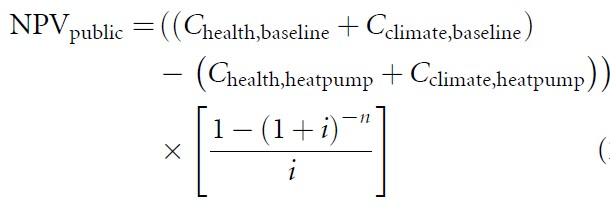

### PUBLIC NPV: WHOLE-HOME

In [11]:
print("""
-------------------------------------------------------------------------------------------------------
print("Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

print("Calculating Public NPV for each end-use ...")
# calculate_public_npv(df, menu_mp, interest_rate=0.02, grid_decarb=False, drop_columns=False, drop_health_climate=False)
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           menu_mp=menu_mp,
                                           interest_rate=0.02,
                                           grid_decarb=False,
                                           drop_columns=False,
                                           drop_health_climate=False
                                           )
df_euss_am_mp8_home


-------------------------------------------------------------------------------------------------------
print("Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------

Calculating Public NPV for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_heating_public_npv,mp8_waterHeating_climate_npv,mp8_waterHeating_health_npv,mp8_waterHeating_public_npv,mp8_clothesDrying_climate_npv,mp8_clothesDrying_health_npv,mp8_clothesDrying_public_npv,mp8_cooking_climate_npv,mp8_cooking_health_npv,mp8_cooking_public_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,5469.09,1175.66,125.71,1301.36,-63.21,5.79,-57.42,-293.22,-47.16,-340.38
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,18173.13,684.31,209.18,893.48,170.45,188.27,358.72,-91.87,206.62,114.74
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,36250.97,1155.87,448.28,1604.15,198.03,102.14,300.16,-87.63,63.73,-23.90
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,23450.61,947.00,100.71,1047.72,612.59,675.91,1288.49,-116.29,261.74,145.45
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,35745.86,2305.41,766.04,3071.45,247.39,109.97,357.36,-109.60,59.62,-49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,4634.03,947.72,109.69,1057.41,-47.78,7.15,-40.63,-251.59,-36.49,-288.08
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,39704.92,4630.61,2263.02,6893.63,478.22,348.40,826.62,-162.93,208.54,45.61
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,372.55,2163.88,-703.66,1460.22,-436.23,-330.58,-766.81,-643.11,-353.74,-996.85
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,4982.36,845.58,-183.15,662.44,177.49,96.12,273.61,-264.18,-17.22,-281.40


## Private Perspective: Annual Energy Costs

In [12]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------
""")




------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------



### Post-Retrofit (MP) Fuel Cost: WHOLE-HOME

In [13]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# calculate_annual_fuelCost(df, fuel_price_lookup)
df_euss_am_mp8_home = calculate_annual_fuelCost(df=df_euss_am_mp8_home,
                                                fuel_price_lookup=fuel_price_lookup,
                                                menu_mp=menu_mp
                                                )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------

Calculating POST-RETROFIT (MP8) fuel costs from 2018 to 2033 for heating
Calculating POST-RETROFIT (MP8) fuel costs from 2018 to 2030 for waterHeating
Calculating POST-RETROFIT (MP8) fuel costs from 2018 to 2031 for clothesDrying
Calculating POST-RETROFIT (MP8) fuel costs from 2018 to 2033 for cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_2030_cooking_delta_fuelCost,mp8_2030_cooking_percentChange_fuelCost,mp8_2031_cooking_fuelCost,mp8_2031_cooking_savings_fuelCost,mp8_2031_cooking_delta_fuelCost,mp8_2031_cooking_percentChange_fuelCost,mp8_2032_cooking_fuelCost,mp8_2032_cooking_savings_fuelCost,mp8_2032_cooking_delta_fuelCost,mp8_2032_cooking_percentChange_fuelCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,42.24,114.22,79.85,-42.87,42.87,115.93,81.19,-44.16,44.16,119.25
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,0.00,0.00,57.16,0.00,0.00,0.00,58.12,0.00,0.00,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.00,0.00,54.60,0.00,0.00,0.00,55.51,0.00,0.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.00,0.00,72.35,0.00,0.00,0.00,73.57,0.00,0.00,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.00,0.00,68.26,0.00,0.00,0.00,69.40,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,36.17,114.64,68.26,-36.71,36.71,116.35,69.40,-37.81,37.81,119.69
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.00,0.00,101.50,0.00,0.00,0.00,103.20,0.00,0.00,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,57.36,114.06,108.50,-58.21,58.21,115.75,110.32,-59.96,59.96,119.06
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,0.00,0.00,68.26,0.00,0.00,0.00,69.40,0.00,0.00,0.00


## Private Perspective: Private NPV

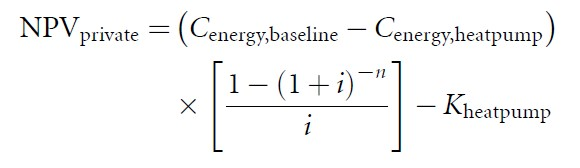

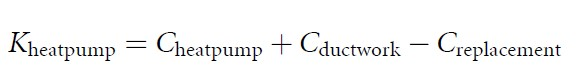

In [14]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP8))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
""")




------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP8))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------



In [15]:
# Collect Capital Cost Data for different End-uses
filename = "tare_retrofit_costs_cpi.xlsx"
relative_path = os.path.join(r"retrofit_costs", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

df_heating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='heating_costs')
df_waterHeating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='waterHeating_costs')
df_clothesDrying_retrofit_costs = pd.read_excel(io=file_path, sheet_name='clothesDrying_costs')
df_cooking_retrofit_costs = pd.read_excel(io=file_path, sheet_name='cooking_costs')
df_enclosure_retrofit_costs = pd.read_excel(io=file_path, sheet_name='enclosure_upgrade_costs')

Retrieved data for filename: tare_retrofit_costs_PPIDCS.xlsx
Located at filepath: c:\Users\14128\Research\cmu-tare-model\retrofit_costs\tare_retrofit_costs_PPIDCS.xlsx




In [16]:
# Assuming df_rsMeans_cityCostIndex is your DataFrame with average costs
# Accounts for the costs of materials, labor and equipment and compares it to a national average of 30 major U.S. cities
average_cost_map = df_rsMeans_cityCostIndex.set_index('City')['Average'].to_dict()
rsMeans_national_avg = round((3.00 * (cpi_ratio_2023_2019)), 2)

# Use CCI to adjust for cost differences when compared to the national average
# Call the function and map the values for CCI adjustment
df_euss_am_mp8_home['rsMeans_CCI_avg'] = df_euss_am_mp8_home['city'].apply(map_average_cost)
df_euss_am_mp8_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_2030_cooking_percentChange_fuelCost,mp8_2031_cooking_fuelCost,mp8_2031_cooking_savings_fuelCost,mp8_2031_cooking_delta_fuelCost,mp8_2031_cooking_percentChange_fuelCost,mp8_2032_cooking_fuelCost,mp8_2032_cooking_savings_fuelCost,mp8_2032_cooking_delta_fuelCost,mp8_2032_cooking_percentChange_fuelCost,rsMeans_CCI_avg
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,114.22,79.85,-42.87,42.87,115.93,81.19,-44.16,44.16,119.25,3.0
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,0.00,57.16,0.00,0.00,0.00,58.12,0.00,0.00,0.00,3.0
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.00,54.60,0.00,0.00,0.00,55.51,0.00,0.00,0.00,3.0
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.00,72.35,0.00,0.00,0.00,73.57,0.00,0.00,0.00,3.0
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.00,68.26,0.00,0.00,0.00,69.40,0.00,0.00,0.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,114.64,68.26,-36.71,36.71,116.35,69.40,-37.81,37.81,119.69,3.0
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.00,101.50,0.00,0.00,0.00,103.20,0.00,0.00,0.00,3.0
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,114.06,108.50,-58.21,58.21,115.75,110.32,-59.96,59.96,119.06,3.0
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,0.00,68.26,0.00,0.00,0.00,69.40,0.00,0.00,0.00,3.0


### Space Heating and No Enclosure Upgrade

#### Space Heating Capital Costs

In [17]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_kBtuh_progressive', 'cost_per_kBtuh_reference', 'cost_per_kBtuh_conservative',
    'otherCost_progressive', 'otherCost_reference', 'otherCost_conservative'
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_heating_retrofit_costs[column] = round((df_heating_retrofit_costs[column] * df_heating_retrofit_costs['cpi_ratio'] * df_heating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_heating_equipment_cost = df_heating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_heating_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------



In [18]:
# # Replacement Cost Function and Helper Functions (Parametes, Formula)

# # Helper function to get parameters based on end use
# def get_end_use_replacement_parameters(df, end_use, menu_mp):
#     parameters = {
#         'heating': {
#             'conditions': [
#                 (df['base_heating_fuel'] == 'Propane'),
#                 (df['base_heating_fuel'] == 'Fuel Oil'),
#                 (df['base_heating_fuel'] == 'Natural Gas'),
#                 (df['base_heating_fuel'] == 'Electricity') & (df['heating_type'] == 'Electricity ASHP'),
#                 (df['base_heating_fuel'] == 'Electricity')
#             ],
#             'tech_eff_pairs': [
#                 ('Propane Furnace', '94 AFUE'),
#                 ('Fuel Oil Furnace', '95 AFUE'),
#                 ('Natural Gas Furnace', '95 AFUE'),
#                 ('Electric ASHP', 'SEER 18, 9.3 HSPF'),
#                 ('Electric Furnace', '100 AFUE')
#             ],
#             'cost_components': ['unitCost', 'otherCost', 'cost_per_kBtuh']
#         },
#         'waterHeating': {
#             'conditions': [
#                 (df['base_waterHeating_fuel'] == 'Fuel Oil'),
#                 (df['base_waterHeating_fuel'] == 'Natural Gas'),
#                 (df['base_waterHeating_fuel'] == 'Propane'),
#                 (df['water_heater_efficiency'].isin(['Electric Standard', 'Electric Premium'])),
#                 (df['water_heater_efficiency'] == 'Electric Heat Pump, 80 gal')
#             ],
#             'tech_eff_pairs': [
#                 ('Fuel Oil Water Heater', 0.68),
#                 ('Natural Gas Water Heater', 0.67),
#                 ('Propane Water Heater', 0.67),
#                 ('Electric Water Heater', 0.95),
#                 ('Electric Heat Pump Water Heater, 80 gal', 2.35)
#             ],
#             'cost_components': ['unitCost', 'cost_per_gallon']
#         },
#         'clothesDrying': {
#             'conditions': [
#                 (df['base_clothesDrying_fuel'] == 'Electricity'),
#                 (df['base_clothesDrying_fuel'] == 'Natural Gas'),
#                 (df['base_clothesDrying_fuel'] == 'Propane')
#             ],
#             'tech_eff_pairs': [
#                 ('Electric Clothes Dryer', 3.1),
#                 ('Natural Gas Clothes Dryer', 2.75),
#                 ('Propane Clothes Dryer', 2.75)
#             ],
#             'cost_components': ['unitCost']
#         },
#         'cooking': {
#             'conditions': [
#                 (df['base_cooking_fuel'] == 'Electricity'),
#                 (df['base_cooking_fuel'] == 'Natural Gas'),
#                 (df['base_cooking_fuel'] == 'Propane')
#             ],
#             'tech_eff_pairs': [
#                 ('Electric Range', 0.74),
#                 ('Natural Gas Range', 0.4),
#                 ('Propane Range', 0.4)
#             ],
#             'cost_components': ['unitCost']
#         }
#     }
#     if end_use not in parameters:
#         raise ValueError(f"Invalid end_use specified: {end_use}")
#     return parameters[end_use]

# def calculate_replacement_cost_per_row(df_valid, sampled_costs_dict, rsMeans_national_avg, menu_mp, end_use):
#     """
#     Helper function to calculate the replacement cost for each row based on the end use.

#     Parameters:
#     df_valid (pd.DataFrame): Filtered DataFrame containing valid rows.
#     sampled_costs_dict (dict): Dictionary with sampled costs for each component.
#     rsMeans_national_avg (float): National average value for cost adjustment.
#     menu_mp (int): Menu option identifier.
#     end_use (str): Type of end-use to calculate replacement cost for ('heating', 'waterHeating', 'clothesDrying', 'cooking').

#     Returns:
#     tuple: Tuple containing the calculated replacement costs and the cost column name.
#     """
#     if end_use == 'heating':
#         replacement_cost = (
#             sampled_costs_dict['unitCost'] +
#             sampled_costs_dict['otherCost'] +
#             (df_valid['total_heating_load_kBtuh'] * sampled_costs_dict['cost_per_kBtuh'])
#         ) * (df_valid['rsMeans_CCI_avg'] / rsMeans_national_avg)
#         cost_column_name = f'mp{menu_mp}_heating_replacementCost'
#     elif end_use == 'waterHeating':
#         replacement_cost = (
#             sampled_costs_dict['unitCost'] +
#             (sampled_costs_dict['cost_per_gallon'] * df_valid['size_water_heater_gal'])
#         ) * (df_valid['rsMeans_CCI_avg'] / rsMeans_national_avg)
#         cost_column_name = f'mp{menu_mp}_waterHeating_replacementCost'
#     else:
#         replacement_cost = sampled_costs_dict['unitCost'] * (df_valid['rsMeans_CCI_avg'] / rsMeans_national_avg)
#         cost_column_name = f'mp{menu_mp}_{end_use}_replacementCost'
    
#     return replacement_cost, cost_column_name

# def calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use):
#     """
#     General function to calculate replacement costs for various end-uses based on fuel types, costs, and efficiency.

#     Parameters:
#     df (pd.DataFrame): DataFrame containing data for different scenarios.
#     cost_dict (dict): Dictionary with cost information for different technology and efficiency combinations.
#     rsMeans_national_avg (float): National average value for cost adjustment.
#     menu_mp (int): Menu option identifier.
#     end_use (str): Type of end-use to calculate replacement cost for ('heating', 'waterHeating', 'clothesDrying', 'cooking').

#     Returns:
#     pd.DataFrame: Updated DataFrame with calculated replacement costs.
#     """
    
#     # Validate menu_mp
#     valid_menu_mps = [7, 8, 9, 10]
#     if menu_mp not in valid_menu_mps:
#         raise ValueError("Please enter a valid measure package number for menu_mp. Should be 7, 8, 9, or 10.")
    
#     # Get conditions, technology-efficiency pairs, and cost components for the specified end_use
#     params = get_end_use_replacement_parameters(df, end_use, menu_mp)
#     conditions = params['conditions']
#     tech_eff_pairs = params['tech_eff_pairs']
#     cost_components = params['cost_components']
   
#     # Map each condition to its tech and efficiency
#     tech = np.select(conditions, [pair[0] for pair in tech_eff_pairs], default='unknown')
#     eff = np.select(conditions, [pair[1] for pair in tech_eff_pairs], default=np.nan)

#     # Convert efficiency values to appropriate types
#     if end_use == 'heating':
#         eff = np.array([str(e) if e != 'unknown' else np.nan for e in eff])
#     else:
#         eff = np.array([float(e) if e != 'unknown' else np.nan for e in eff])

#     # Filter out rows with unknown technology and NaN efficiency
#     valid_indices = tech != 'unknown'
#     tech = tech[valid_indices]
#     eff = eff[valid_indices]
#     df_valid = df.loc[valid_indices].copy()

#     # Initialize dictionaries to store sampled costs
#     sampled_costs_dict = {}

#     # Calculate costs for each component
#     for cost_component in cost_components:
#         progressive_costs = np.array([cost_dict.get((t, e), {}).get(f'{cost_component}_progressive', np.nan) for t, e in zip(tech, eff)])
#         reference_costs = np.array([cost_dict.get((t, e), {}).get(f'{cost_component}_reference', np.nan) for t, e in zip(tech, eff)])
#         conservative_costs = np.array([cost_dict.get((t, e), {}).get(f'{cost_component}_conservative', np.nan) for t, e in zip(tech, eff)])

#         # Handle missing cost data
#         if np.isnan(progressive_costs).any() or np.isnan(reference_costs).any() or np.isnan(conservative_costs).any():
#             missing_indices = np.where(np.isnan(progressive_costs) | np.isnan(reference_costs) | np.isnan(conservative_costs))
#             print(f"Missing data at indices: {missing_indices}")
#             print(f"Tech with missing data: {tech[missing_indices]}")
#             print(f"Efficiencies with missing data: {eff[missing_indices]}")
            
#             raise ValueError(f"Missing cost data for some technology and efficiency combinations in cost_component {cost_component}")

#         # Calculate mean and standard deviation assuming the costs represent the 10th, 50th, and 90th percentiles of a normal distribution
#         mean_costs = reference_costs
#         std_costs = (conservative_costs - progressive_costs) / (norm.ppf(0.90) - norm.ppf(0.10))

#         # Sample from the normal distribution for each row
#         sampled_costs = np.random.normal(loc=mean_costs, scale=std_costs)
#         sampled_costs_dict[cost_component] = sampled_costs

#     # Calculate the replacement cost for each row
#     replacement_cost, cost_column_name = calculate_replacement_cost_per_row(df_valid, sampled_costs_dict, rsMeans_national_avg, menu_mp, end_use)

#     # Add the calculated costs to the DataFrame, rounded to 2 decimal places
#     df_valid.loc[:, cost_column_name] = np.round(replacement_cost, 2)

#     # Reintegrate the valid rows back into the original DataFrame
#     df.loc[valid_indices, cost_column_name] = df_valid[cost_column_name]

#     return df

# # # Example usage
# # calculate_replacement_cost(df=df_euss_am_mp8_home,
# #                            cost_dict=dict_waterHeating_equipment_cost,
# #                            rsMeans_national_avg=rsMeans_national_avg,
# #                            menu_mp=menu_mp, 
# #                            end_use='waterHeating')

In [19]:
# Call the function and obtain equipment specifications
# obtain_heating_system_specs(df)
df_euss_am_mp8_home = obtain_heating_system_specs(df_euss_am_mp8_home)

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# Call the function and calculate installation premium based on existing housing characteristics
# calculate_heating_installation_premium(df, rsMeans_national_avg, cpi_ratio_2023_2013)
df_euss_am_mp8_home = calculate_heating_installation_premium(df_euss_am_mp8_home, rsMeans_national_avg, cpi_ratio_2023_2013)

# Display the df
df_euss_am_mp8_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_2032_cooking_percentChange_fuelCost,rsMeans_CCI_avg,total_heating_load_kBtuh,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp8_heating_installationCost,mp8_heating_replacementCost,mp8_heating_installation_premium
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,119.25,3.0,93.27,80.0,NaN,NaN,NaN,22894.29,3390.00,0.0
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,0.00,3.0,335.38,92.5,NaN,NaN,NaN,70109.05,6401.62,0.0
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,0.00,3.0,114.81,100.0,NaN,NaN,29.3,19517.90,8689.48,0.0
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,0.00,3.0,153.26,80.0,NaN,NaN,NaN,36834.76,5560.97,0.0
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,0.00,3.0,103.75,100.0,NaN,NaN,29.3,17862.11,8034.86,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,119.69,3.0,245.06,92.5,NaN,NaN,NaN,47572.31,4090.65,0.0
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,0.00,3.0,116.49,100.0,NaN,NaN,NaN,33041.19,8788.92,0.0
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,119.06,3.0,58.90,92.5,NaN,NaN,NaN,23769.13,3231.35,0.0
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,0.00,3.0,98.06,80.0,NaN,NaN,NaN,25150.55,3412.11,0.0


### Water Heating

In [20]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_gallon_progressive', 'cost_per_gallon_reference', 'cost_per_gallon_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_waterHeating_retrofit_costs[column] = round((df_waterHeating_retrofit_costs[column] * df_waterHeating_retrofit_costs['cpi_ratio'] * df_waterHeating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_waterHeating_equipment_cost = df_waterHeating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_waterHeating_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------



In [21]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# Display the df
df_euss_am_mp8_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,total_heating_load_kBtuh,baseline_AFUE,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp8_heating_installationCost,mp8_heating_replacementCost,mp8_heating_installation_premium,mp8_waterHeating_installationCost,mp8_waterHeating_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,93.27,80.0,NaN,NaN,NaN,22894.29,3390.00,0.0,2283.08,1711.76
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,335.38,92.5,NaN,NaN,NaN,70109.05,6401.62,0.0,2991.01,2590.66
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,114.81,100.0,NaN,NaN,29.3,19517.90,8689.48,0.0,2380.72,972.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,153.26,80.0,NaN,NaN,NaN,36834.76,5560.97,0.0,3637.20,1894.07
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,103.75,100.0,NaN,NaN,29.3,17862.11,8034.86,0.0,2805.04,972.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,245.06,92.5,NaN,NaN,NaN,47572.31,4090.65,0.0,3580.38,1894.07
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,116.49,100.0,NaN,NaN,NaN,33041.19,8788.92,0.0,3082.53,1030.03
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,58.90,92.5,NaN,NaN,NaN,23769.13,3231.35,0.0,2671.95,1711.76
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,98.06,80.0,NaN,NaN,NaN,25150.55,3412.11,0.0,2951.68,1503.41


### Clothes Drying

In [22]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_clothesDrying_retrofit_costs[column] = round((df_clothesDrying_retrofit_costs[column] * df_clothesDrying_retrofit_costs['cpi_ratio'] * df_clothesDrying_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_clothesDrying_equipment_cost = df_clothesDrying_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_clothesDrying_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------



In [23]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# Display the df
df_euss_am_mp8_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,baseline_SEER,baseline_HSPF,ugrade_newInstall_HSPF,mp8_heating_installationCost,mp8_heating_replacementCost,mp8_heating_installation_premium,mp8_waterHeating_installationCost,mp8_waterHeating_replacementCost,mp8_clothesDrying_installationCost,mp8_clothesDrying_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,22894.29,3390.00,0.0,2283.08,1711.76,1226.95,1183.79
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,NaN,NaN,NaN,70109.05,6401.62,0.0,2991.01,2590.66,1720.64,899.68
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,NaN,NaN,29.3,19517.90,8689.48,0.0,2380.72,972.00,1946.53,899.68
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,NaN,NaN,36834.76,5560.97,0.0,3637.20,1894.07,2191.90,899.68
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,NaN,NaN,29.3,17862.11,8034.86,0.0,2805.04,972.00,1212.30,899.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,NaN,NaN,NaN,47572.31,4090.65,0.0,3580.38,1894.07,1356.46,1183.79
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,NaN,NaN,NaN,33041.19,8788.92,0.0,3082.53,1030.03,2171.52,899.68
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,NaN,NaN,NaN,23769.13,3231.35,0.0,2671.95,1711.76,1703.69,1183.79
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,NaN,NaN,25150.55,3412.11,0.0,2951.68,1503.41,1674.43,899.68


### Cooking

In [24]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_cooking_retrofit_costs[column] = round((df_cooking_retrofit_costs[column] * df_cooking_retrofit_costs['cpi_ratio'] * df_cooking_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_cooking_equipment_cost = df_cooking_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_cooking_equipment_cost


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------



In [25]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# Display the df
df_euss_am_mp8_home

,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,ugrade_newInstall_HSPF,mp8_heating_installationCost,mp8_heating_replacementCost,mp8_heating_installation_premium,mp8_waterHeating_installationCost,mp8_waterHeating_replacementCost,mp8_clothesDrying_installationCost,mp8_clothesDrying_replacementCost,mp8_cooking_installationCost,mp8_cooking_replacementCost
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,22894.29,3390.00,0.0,2283.08,1711.76,1226.95,1183.79,1390.90,970.70
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,NaN,70109.05,6401.62,0.0,2991.01,2590.66,1720.64,899.68,1909.02,1089.09
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,29.3,19517.90,8689.48,0.0,2380.72,972.00,1946.53,899.68,563.02,1089.09
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,NaN,36834.76,5560.97,0.0,3637.20,1894.07,2191.90,899.68,2406.03,1089.09
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,29.3,17862.11,8034.86,0.0,2805.04,972.00,1212.30,899.68,1934.44,1089.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,NaN,47572.31,4090.65,0.0,3580.38,1894.07,1356.46,1183.79,1124.97,970.70
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,NaN,33041.19,8788.92,0.0,3082.53,1030.03,2171.52,899.68,1010.42,1089.09
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,NaN,23769.13,3231.35,0.0,2671.95,1711.76,1703.69,1183.79,814.15,970.70
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,NaN,25150.55,3412.11,0.0,2951.68,1503.41,1674.43,899.68,906.82,1089.09


## Private NPV Calculation for Whole Home

### Update code with the following:
Replace the singular savings column with the annual varying one.
{year_label}_mp{menu_mp}_

In [26]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Calculate Private NPV for WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, input_mp, menu_mp, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            ira_rebates=False,
                                            )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Calculate Private NPV for WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------



,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_waterHeating_private_npv_total,mp8_waterHeating_private_npv,mp8_clothesDrying_total_capitalCost,mp8_clothesDrying_net_capitalCost,mp8_clothesDrying_private_npv_total,mp8_clothesDrying_private_npv,mp8_cooking_total_capitalCost,mp8_cooking_net_capitalCost,mp8_cooking_private_npv_total,mp8_cooking_private_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,5140.87,6852.63,1226.95,43.16,-2988.32,-1804.53,1390.90,420.20,-6403.44,-5432.74
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,12942.97,15533.63,1720.64,820.96,641.57,1541.25,1909.02,819.93,-1909.02,-819.93
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,11105.96,12077.96,1946.53,1046.85,796.70,1696.38,563.02,-526.07,-563.02,526.07
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,2315.13,4209.20,2191.90,1292.22,6293.96,7193.64,2406.03,1316.94,-2406.03,-1316.94
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,23767.30,24739.30,1212.30,312.62,2215.42,3115.10,1934.44,845.35,-1934.44,-845.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,2246.93,4141.00,1356.46,172.67,-2685.24,-1501.45,1124.97,154.27,-5419.35,-4448.65
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,49945.86,50975.89,2171.52,1271.84,4454.01,5353.69,1010.42,-78.67,-1010.42,78.67
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,14247.32,15959.08,1703.69,519.90,-6629.61,-5445.82,814.15,-156.55,-7618.22,-6647.52
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,3669.34,5172.75,1674.43,774.75,1753.29,2652.97,906.82,-182.27,-906.82,182.27


## Determine Adoption Decision for WHOLE-HOME

In [27]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Call the function
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=False,
                                        grid_decarb=False,
                                        )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------



,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_heating_retrofit_publicImpact,mp8_waterHeating_net_npv,mp8_waterHeating_adoption,mp8_waterHeating_retrofit_publicImpact,mp8_clothesDrying_net_npv,mp8_clothesDrying_adoption,mp8_clothesDrying_retrofit_publicImpact,mp8_cooking_net_npv,mp8_cooking_adoption,mp8_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,8153.99,Adoption,Public Benefit,-1861.95,Averse to Adoption,Public Detriment,-5773.12,Averse to Adoption,Public Detriment
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,16427.11,Adoption,Public Benefit,1899.97,Adoption,Public Benefit,-705.19,Existing Equipment,Public Benefit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,Public Benefit,13682.11,Adoption,Public Benefit,1996.54,Adoption,Public Benefit,502.17,Existing Equipment,Public Detriment
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5256.92,Adoption,Public Benefit,8482.13,Adoption,Public Benefit,-1171.49,Existing Equipment,Public Benefit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,Public Benefit,27810.75,Adoption,Public Benefit,3472.46,Adoption,Public Benefit,-895.33,Existing Equipment,Public Detriment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5198.41,Adoption,Public Benefit,-1542.08,Averse to Adoption,Public Detriment,-4736.73,Averse to Adoption,Public Detriment
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,Public Benefit,57869.52,Adoption,Public Benefit,6180.31,Adoption,Public Benefit,124.28,Existing Equipment,Public Benefit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,17419.30,Adoption,Public Benefit,-6212.63,Averse to Adoption,Public Detriment,-7644.37,Averse to Adoption,Public Detriment
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,5835.19,Adoption,Public Benefit,2926.58,Adoption,Public Benefit,-99.13,Existing Equipment,Public Detriment


In [28]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                            category = 'heating',
#                            upgrade_column = 'upgrade_hvac_heating_efficiency'
#                           )

In [29]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [30]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [31]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electrification: Basic Retrofit

## WHOLE-HOME Retrofit Adoption Rate with IRA Rebates
### Scenario Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Grid

In [32]:
# Measure Package 8
scenario_name = 'Basic-IRA'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-IRA:
Basic Retrofit: Measure Package 8
IRA Rebates
Current Electricity Grid
-------------------------------------------------------------------------------------------------------



### WHOLE-HOME Retrofit Adoption with IRA Rebates

In [33]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------



In [34]:
# Determine Percent AMI and Rebate Amounts
# Create a copy of the results df and define it as results_IRA
# This needs to be done before running the calculate_percent_AMI function
df_euss_am_mp8_home = df_euss_am_mp8_home.copy()

# calculate_percent_AMI(df_results_IRA, df_county_medianIncome):
df_euss_am_mp8_home = calculate_percent_AMI(df_euss_am_mp8_home, df_county_medianIncome)

print("Calculating rebate amounts for Space Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "heating", menu_mp)

print("Calculating rebate amounts for Water Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "waterHeating", menu_mp)

print("Calculating rebate amounts for Clothes Drying ...")
calculate_rebateIRA(df_euss_am_mp8_home, "clothesDrying", menu_mp)

print("Calculating rebate amounts for Cooking ...")
calculate_rebateIRA(df_euss_am_mp8_home, "cooking", menu_mp)

Calculating rebate amounts for Space Heating ...
Calculating rebate amounts for Water Heating ...
Calculating rebate amounts for Clothes Drying ...
Calculating rebate amounts for Cooking ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_cooking_net_npv,mp8_cooking_adoption,mp8_cooking_retrofit_publicImpact,census_county_medianIncome,percent_AMI,lowModerateIncome_designation,mp8_heating_rebate_amount,mp8_waterHeating_rebate_amount,mp8_clothesDrying_rebate_amount,mp8_cooking_rebate_amount
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-5773.12,Averse to Adoption,Public Detriment,103986.0,113.22,Moderate-Income,8000.0,1141.54,613.48,695.45
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,-705.19,Existing Equipment,Public Benefit,52134.0,49.74,Low-Income,8000.0,1750.00,840.00,0.00
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,502.17,Existing Equipment,Public Detriment,52709.0,107.51,Moderate-Income,8000.0,1190.36,840.00,0.00
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,-1171.49,Existing Equipment,Public Benefit,103986.0,192.33,Middle-to-Upper-Income,0.0,0.00,0.00,0.00
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,-895.33,Existing Equipment,Public Detriment,58055.0,197.53,Middle-to-Upper-Income,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,-4736.73,Averse to Adoption,Public Detriment,103269.0,179.05,Middle-to-Upper-Income,0.0,0.00,0.00,0.00
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,124.28,Existing Equipment,Public Benefit,52490.0,152.41,Middle-to-Upper-Income,0.0,0.00,0.00,0.00
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,-7644.37,Averse to Adoption,Public Detriment,47745.0,200.09,Middle-to-Upper-Income,0.0,0.00,0.00,0.00
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,-99.13,Existing Equipment,Public Detriment,55446.0,154.61,Middle-to-Upper-Income,0.0,0.00,0.00,0.00


In [35]:
print("Calculating Private NPV for each end-use ...")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, input_mp, menu_mp, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            ira_rebates=True,
                                            )
df_euss_am_mp8_home

Calculating Private NPV for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,ira_mp8_waterHeating_private_npv_total,ira_mp8_waterHeating_private_npv,ira_mp8_clothesDrying_total_capitalCost,ira_mp8_clothesDrying_net_capitalCost,ira_mp8_clothesDrying_private_npv_total,ira_mp8_clothesDrying_private_npv,ira_mp8_cooking_total_capitalCost,ira_mp8_cooking_net_capitalCost,ira_mp8_cooking_private_npv_total,ira_mp8_cooking_private_npv
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,6282.41,7994.17,613.47,-570.32,-2374.84,-1191.05,695.45,-275.25,-5707.99,-4737.29
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,14692.97,17283.63,880.64,-19.04,1481.57,2381.25,1909.02,819.93,-1909.02,-819.93
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,12296.32,13268.32,1106.53,206.85,1636.70,2536.38,563.02,-526.07,-563.02,526.07
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,2315.13,4209.20,2191.90,1292.22,6293.96,7193.64,2406.03,1316.94,-2406.03,-1316.94
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,23767.30,24739.30,1212.30,312.62,2215.42,3115.10,1934.44,845.35,-1934.44,-845.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,2246.93,4141.00,1356.46,172.67,-2685.24,-1501.45,1124.97,154.27,-5419.35,-4448.65
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,49945.86,50975.89,2171.52,1271.84,4454.01,5353.69,1010.42,-78.67,-1010.42,78.67
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,14247.32,15959.08,1703.69,519.90,-6629.61,-5445.82,814.15,-156.55,-7618.22,-6647.52
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,3669.34,5172.75,1674.43,774.75,1753.29,2652.97,906.82,-182.27,-906.82,182.27


In [36]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=False
                                        )
df_euss_am_mp8_home

Determining Adoption Decision for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,mp8_heating_retrofit_publicImpact,ira_mp8_waterHeating_net_npv,ira_mp8_waterHeating_adoption,mp8_waterHeating_retrofit_publicImpact,ira_mp8_clothesDrying_net_npv,ira_mp8_clothesDrying_adoption,mp8_clothesDrying_retrofit_publicImpact,ira_mp8_cooking_net_npv,ira_mp8_cooking_adoption,mp8_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,9295.53,Adoption,Public Benefit,-1248.47,Averse to Adoption,Public Detriment,-5077.67,Averse to Adoption,Public Detriment
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,18177.11,Adoption,Public Benefit,2739.97,Adoption,Public Benefit,-705.19,Existing Equipment,Public Benefit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,Public Benefit,14872.47,Adoption,Public Benefit,2836.54,Adoption,Public Benefit,502.17,Existing Equipment,Public Detriment
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5256.92,Adoption,Public Benefit,8482.13,Adoption,Public Benefit,-1171.49,Existing Equipment,Public Benefit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,Public Benefit,27810.75,Adoption,Public Benefit,3472.46,Adoption,Public Benefit,-895.33,Existing Equipment,Public Detriment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5198.41,Adoption,Public Benefit,-1542.08,Averse to Adoption,Public Detriment,-4736.73,Averse to Adoption,Public Detriment
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,Public Benefit,57869.52,Adoption,Public Benefit,6180.31,Adoption,Public Benefit,124.28,Existing Equipment,Public Benefit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,17419.30,Adoption,Public Benefit,-6212.63,Averse to Adoption,Public Detriment,-7644.37,Averse to Adoption,Public Detriment
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,5835.19,Adoption,Public Benefit,2926.58,Adoption,Public Benefit,-99.13,Existing Equipment,Public Detriment


In [37]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [38]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [39]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [40]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electricity Grid Decarbonization Scenarios

"Since the lifetime of a heat pump is 15 years [31, 32], we assume that emissions will diminish in all US electric grids during the life of the heat pump. To capture this effect, we use electric grid emissions projections from EPRI's National Electrification Assessment [16]. We use that study's 'Progressive' scenario (a balance between the study's 'Conservative' and 'Transformative' scenarios) to assume that from 2017 to 2032, (a) coal energy will decline by 75% from 1200 TWh to 300 TWh and (b) CO2 emissions intensity will decline by 45% from 850 lbs MWh−1 to 450 lbs MWh−1. We assume that the majority of health damages from coal energy [33]. Thus, we assume for each grid region that health damages will decline by 75% and CO2 emissions by 45% by 2032. We assume a linear trend."

15 year period from 2017 to 2032. Then levels off after 2032. 
- 75% health damage reduction / 15 years = 5%/year
- 45% CO2 emissions reduction / 15 years = 3%/year

In [41]:
# Measure Package 8
scenario_name = 'Basic-IRA-Decarb'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Gradually Decarbonizing Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-IRA-Decarb:
Basic Retrofit: Measure Package 8
IRA Rebates
Gradually Decarbonizing Grid
-------------------------------------------------------------------------------------------------------



In [42]:
# pd.set_option("display.max_columns", None)
# # pd.reset_option('display.max_columns')
# # pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Scenario Basic-IRA-Decarb: 
# Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid
**Steps**:
- Private Perspective Impacts do not change with the Decarbonizing Grid
- Public Perspective Impacts do change:
    - Emissions and damages from pollutants changes with a gradually decarbonizing grid
    - Updated Public NPV (gridDecarb) value and function
    - Update Net NPV (ira_gridDecarb)
    - Updated Adoption Rate (ira_gridDecarb)

## IRA, Grid Decarb: Public NPV and Adoption Rate

In [43]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
------------------------------------------------------------------------------------------------------------------------------------------------



In [44]:
print("Calculating Marginal Damages for each end-use ...")

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=True,
                                                 )
df_euss_am_mp8_home

Calculating Marginal Damages for each end-use ...
End-use category: heating
End-use category: waterHeating
End-use category: clothesDrying
End-use category: cooking


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp8_2032_cooking_reduction_damages_climate,gridDecarb_mp8_2032_cooking_reduction_damages_health,gridDecarb_mp8_2032_heating_damages_climate,gridDecarb_mp8_2032_heating_damages_co2,gridDecarb_mp8_2032_heating_damages_health,gridDecarb_mp8_2032_heating_damages_nox,gridDecarb_mp8_2032_heating_damages_pm25,gridDecarb_mp8_2032_heating_damages_so2,gridDecarb_mp8_2032_heating_reduction_damages_climate,gridDecarb_mp8_2032_heating_reduction_damages_health
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,10.46,4.28,236.65,236.65,26.77,2.86,10.01,13.90,560.04,83.59
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,16.67,21.78,533.33,533.33,60.32,6.44,22.55,31.33,1465.65,420.49
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,15.92,10.41,283.47,283.47,32.06,3.42,11.99,16.65,2238.36,744.85
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,21.10,27.58,603.60,603.60,68.27,7.29,25.52,35.46,1831.88,517.52
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,19.91,11.45,314.62,314.62,35.58,3.80,13.30,18.48,2285.23,691.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,8.86,3.97,316.61,316.61,35.81,3.82,13.39,18.60,569.32,91.97
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,29.61,26.35,401.88,401.88,45.45,4.85,16.99,23.61,2329.76,1028.93
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,14.14,-6.79,259.03,259.03,56.05,6.37,17.44,32.24,436.06,-17.17
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,19.82,11.71,424.66,424.66,91.91,10.45,28.60,52.86,1011.67,0.66


In [52]:
print("Calculating Public NPV for each end-use ...")
# calculate_public_npv(df, menu_mp, interest_rate=0.02, grid_decarb=False, drop_columns=False, drop_health_climate=False)
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           menu_mp=menu_mp,
                                           interest_rate=0.02,
                                           grid_decarb=True,
                                           drop_columns=True,
                                           drop_health_climate=True
                                           )
df_euss_am_mp8_home

Calculating Public NPV for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp8_heating_retrofit_publicImpact,ira_gridDecarb_mp8_waterHeating_net_npv,ira_gridDecarb_mp8_waterHeating_adoption,gridDecarb_mp8_waterHeating_retrofit_publicImpact,ira_gridDecarb_mp8_clothesDrying_net_npv,ira_gridDecarb_mp8_clothesDrying_adoption,gridDecarb_mp8_clothesDrying_retrofit_publicImpact,ira_gridDecarb_mp8_cooking_net_npv,ira_gridDecarb_mp8_cooking_adoption,gridDecarb_mp8_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,9295.53,Adoption,Public Benefit,-1248.47,Averse to Adoption,Public Detriment,-5077.67,Averse to Adoption,Public Detriment
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,18177.11,Adoption,Public Benefit,2739.97,Adoption,Public Benefit,-705.19,Existing Equipment,Public Benefit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,Public Benefit,14872.47,Adoption,Public Benefit,2836.54,Adoption,Public Benefit,502.17,Existing Equipment,Public Detriment
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5256.92,Adoption,Public Benefit,8482.13,Adoption,Public Benefit,-1171.49,Existing Equipment,Public Benefit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,Public Benefit,27810.75,Adoption,Public Benefit,3472.46,Adoption,Public Benefit,-895.33,Existing Equipment,Public Detriment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5198.41,Adoption,Public Benefit,-1542.08,Averse to Adoption,Public Detriment,-4736.73,Averse to Adoption,Public Detriment
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,Public Benefit,57869.52,Adoption,Public Benefit,6180.31,Adoption,Public Benefit,124.28,Existing Equipment,Public Benefit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,17419.30,Adoption,Public Benefit,-6212.63,Averse to Adoption,Public Detriment,-7644.37,Averse to Adoption,Public Detriment
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,5835.19,Adoption,Public Benefit,2926.58,Adoption,Public Benefit,-99.13,Existing Equipment,Public Detriment


In [46]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=True,
                                       )
df_euss_am_mp8_home

Determining Adoption Decision for each end-use ...


,bldg_id,square_footage,census_region,census_division,census_division_recs,building_america_climate_zone,cambium_GEA_region,state,city,county,...,gridDecarb_mp8_heating_retrofit_publicImpact,ira_gridDecarb_mp8_waterHeating_net_npv,ira_gridDecarb_mp8_waterHeating_adoption,gridDecarb_mp8_waterHeating_retrofit_publicImpact,ira_gridDecarb_mp8_clothesDrying_net_npv,ira_gridDecarb_mp8_clothesDrying_adoption,gridDecarb_mp8_clothesDrying_retrofit_publicImpact,ira_gridDecarb_mp8_cooking_net_npv,ira_gridDecarb_mp8_cooking_adoption,gridDecarb_mp8_cooking_retrofit_publicImpact
0,119,2152.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,9295.53,Adoption,Public Benefit,-1248.47,Averse to Adoption,Public Detriment,-5077.67,Averse to Adoption,Public Detriment
1,122,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,In another census Place,G4200450,...,Public Benefit,18177.11,Adoption,Public Benefit,2739.97,Adoption,Public Benefit,-705.19,Existing Equipment,Public Benefit
2,150,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,In another census Place,G4201190,...,Public Benefit,14872.47,Adoption,Public Benefit,2836.54,Adoption,Public Benefit,502.17,Existing Equipment,Public Detriment
3,162,2663.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200450,...,Public Benefit,5256.92,Adoption,Public Benefit,8482.13,Adoption,Public Benefit,-1171.49,Existing Equipment,Public Benefit
4,181,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Not in a census Place,G4200270,...,Public Benefit,27810.75,Adoption,Public Benefit,3472.46,Adoption,Public Benefit,-895.33,Existing Equipment,Public Detriment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,549748,3301.0,Northeast,Middle Atlantic,Middle Atlantic,Mixed-Humid,RFCEc,PA,Not in a census Place,G4200910,...,Public Benefit,5198.41,Adoption,Public Benefit,-1542.08,Averse to Adoption,Public Detriment,-4736.73,Averse to Adoption,Public Detriment
11605,549915,2176.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCEc,PA,Lancaster,G4200710,...,Public Benefit,57869.52,Adoption,Public Benefit,6180.31,Adoption,Public Benefit,124.28,Existing Equipment,Public Benefit
11606,549937,885.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4200050,...,Public Benefit,17419.30,Adoption,Public Benefit,-6212.63,Averse to Adoption,Public Detriment,-7644.37,Averse to Adoption,Public Detriment
11607,549963,1690.0,Northeast,Middle Atlantic,Middle Atlantic,Cold,RFCWc,PA,In another census Place,G4201290,...,Public Benefit,5835.19,Adoption,Public Benefit,2926.58,Adoption,Public Benefit,-99.13,Existing Equipment,Public Detriment


In [47]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [48]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [49]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [50]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Model Runtime

In [51]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 3 minutes and 59 seconds to execute.
